# Python - MATLAB Bridge Example

## Solution of Laplace's equation by Conformal Mapping

MATLAB (c) The Mathworks 2015 

The output of this notebook requires that you have 
- MATLAB installed 
- [pymatbridge](http://arokem.github.io/python-matlab-bridge/) 
- [The Schwarz-Christoffel Toolbox for MATLAB](http://www.math.udel.edu/~driscoll/SC/) 

This approach to calling into an external process is convenient if you really only need to visualise or capture the output from that tool, but want to incorporate it into a python workflow.

## Solution of Laplace's Equation

In mathematics, Laplace's equation is a second-order partial differential equation, most commonly used in many fields of science. For example, you may want to find the stationary heat distribution in a region $\Omega$ subject to heat being applied at some the boundary of the region $\partial \Omega$.  This occurs when heat transfer does not change as a function of time (ie/ $\frac{\partial u}{\partial t} = 0$).

$$
\bigtriangledown f = \bigtriangleup^2 f = 0
$$

Analytic solutions exist for such problems exist only for a small number of domains (the infinite half plane, the unit disk), but in some cases it's possible to solve in more complex domains by conformal mapping. Unfortunately, there is no conformal mapping package for Python mapping that can solve Laplace's equation

*In practice other (and Finite Element) packages will solve such problems just as well, and in some cases more robustly.*

In [1]:
%load_ext pymatbridge

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-3691b0ef-9310-4841-92e9-c5339a856e7c
Send 'exit' command to kill the server
.....MATLAB started and connected!


In [ ]:
%%matlab
cd sc;

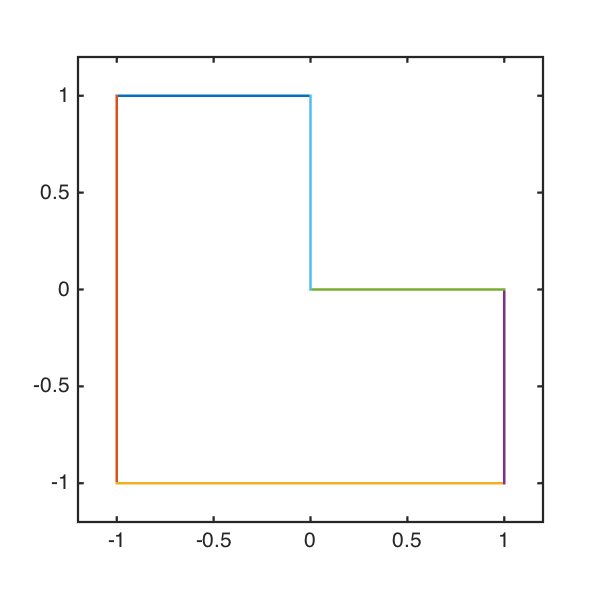

In [39]:
%%matlab --size 600,600
p=polygon([i -1+i -1-i 1-i 1 0]);
plot(p);

In [36]:
import numpy as np
boundary_conditions = [0, 0, 0, 1, 0, 0]

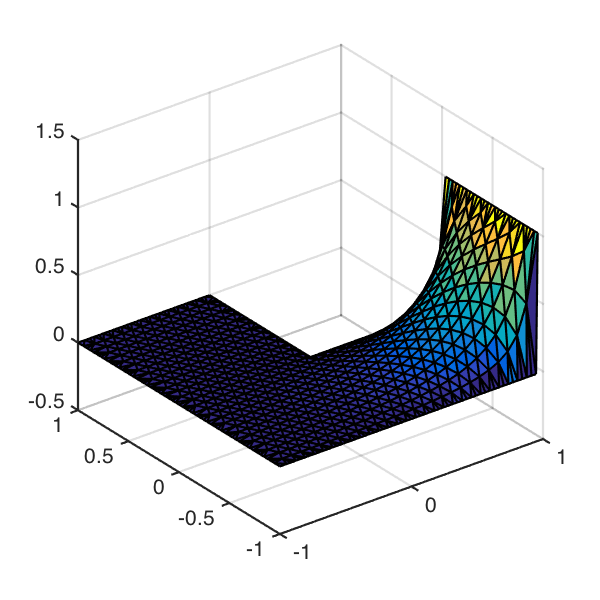

In [40]:
%%matlab -i boundary_conditions --size 600,600
phi = lapsolve(p, boundary_conditions);
[tri, x, y] = triangulate(p);
figure;
trisurf(tri, x, y, phi(x+i*y));